In [1]:
# #Testing
# import numpy as np

# a = np.ones((5, 1))
# b = np.ones((1, 5))
# b@a


In [2]:
import numpy as np

props = np.genfromtxt("./data_lab2/animals.dat", delimiter=',')
props = np.reshape(props, (32, 84))

animal_names = np.genfromtxt("./data_lab2/animalnames.txt", dtype='str')


nodesNb = 100

def find_winner(animal, W):

    d = np.linalg.norm(p-W, axis=1)
    return np.argmin(d)

epochsNb = 20

animalNb = props.shape[0]
attNb = props.shape[1]
W = np.random.uniform(0, 1, (nodesNb, attNb))
eta = 0.2

for epoch in range(epochsNb):

    #Update neighbourh_size
    neighbourh_size = 50 - 2.5*epoch

    for animal in range(animalNb):
        #Choose current animal
        p = props[animal, :]

        #Find the idx of the row of the weight matrix w/ shortest dist
        winner = find_winner(p, W)

        lower_bound = winner - int(neighbourh_size/2)
        upper_bound = (winner + int(neighbourh_size/2))%100
        
        W[lower_bound:upper_bound+1, :] += eta * ( p - W[lower_bound:upper_bound+1, :] )
    


pos = []
for animal in range(animalNb):

    p = props[animal, :]
    winner = find_winner(animal, W)

    pos.append(winner)

ordered_output = np.argsort(pos)
print(animal_names[ordered_output])

["'bat'" "'rabbit'" "'kangaroo'" "'skunk'" "'hyena'" "'rat'" "'dog'"
 "'cat'" "'lion'" "'ape'" "'walrus'" "'bear'" "'elephant'" "'antelop'"
 "'giraffe'" "'camel'" "'pig'" "'horse'" "'penguin'" "'pelican'"
 "'ostrich'" "'duck'" "'seaturtle'" "'frog'" "'crocodile'" "'moskito'"
 "'housefly'" "'spider'" "'grasshopper'" "'dragonfly'" "'butterfly'"
 "'beetle'"]


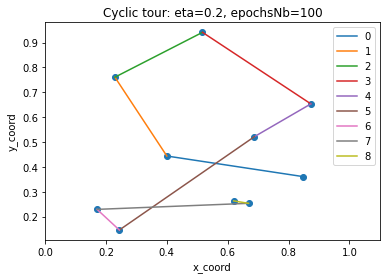

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading
cities = pd.read_csv("./data_lab2/cities.dat", sep=',', skiprows=2)
cities = cities.to_numpy()
# Removing ';' char
for i in range(cities.shape[0]):
    cities[i, 1] = cities[i, 1][:-1]
cities = np.asarray(cities, dtype=np.float64) #str to float

nodesNb = 10

def find_winner(cities, W):

    d = np.linalg.norm(p-W, axis=1)
    return np.argmin(d)

epochsNb = 100

citiesNb = cities.shape[0]
attNb = cities.shape[1]
W = np.random.uniform(0, 1, (nodesNb, attNb))
eta = 0.2

for epoch in range(epochsNb):

    #Update neighbourh_size
    neighbourh_size = 2 - 0.1*epoch

    for city in range(citiesNb):
        #Choose current animal
        p = cities[city, :]

        #Find the idx of the row of the weight matrix w/ shortest dist
        winner = find_winner(p, W)

        lower_bound = winner - int(neighbourh_size/2)
        upper_bound = (winner + int(neighbourh_size/2))%100

        # print(lower_bound, upper_bound)
        
        W[lower_bound:upper_bound+1, :] += eta * ( p - W[lower_bound:upper_bound+1, :] )
    


pos = []
for city in range(citiesNb):

    p = cities[city, :]
    winner = find_winner(city, W)

    pos.append(winner)

ordered_cities = np.argsort(pos)

plt.scatter(cities[:, 0], cities[:, 1])
for i in range(citiesNb-1):
    plt.plot( (cities[ordered_cities][i, 0], cities[ordered_cities][i+1, 0]),\
        (cities[ordered_cities][i, 1], cities[ordered_cities][i+1, 1]), label=str(i))
leg = plt.legend()
plt.xlim([0, 1.1])
plt.xlabel('x_coord')
plt.ylabel('y_coord')
plt.title(f"Cyclic tour: eta={eta}, epochsNb={epochsNb}")
plt.show()


In [8]:
import numpy.linalg as la

def find_winner(weights, row):
    d = np.linalg.norm(weights-row, axis=1)
    return np.argmin(d)


def som_votes(inputs, outputsize, learning_rate, epochs, neighbourhood_init,seed=1):
    
    
    neighbourhood = neighbourhood_init
    step = neighbourhood_init/epochs
    
    # Definition of neighbourhood indices
    out_indice = np.arange(np.prod(outputsize)).reshape(outputsize)     
    # np.prod : Return the product of array elements over a given axis.
    
    # Init of weights
    np.random.seed(seed)
    W = np.random.uniform(0, 1, size=(np.prod(outputsize), inputs.shape[1]))

    for _ in range(epochs): #iteration per epoch
        for row in inputs: # iteration per sample because we have a time serie
            
            winner = find_winner(W, row)# Find the winner output node
            # Find the indexes of neighbourhood
            n_r = int(neighbourhood)

            win_axis_x, win_axis_y = np.unravel_index(winner, outputsize) # Bc we are on a grid
            # np.unravel_index : Converts a flat array of flat indices into a tuple of coordinate arrays.

            ind = []
            for i in range(out_indice.shape[0]):
                for j in range(out_indice.shape[1]):
                    if (abs(win_axis_x-i)+abs(win_axis_y-j))<=n_r:
                        ind.append(out_indice[i,j])

            delta = learning_rate * (row - W[ind,:])
            W[ind,:] += delta

        neighbourhood -= step
    
    predicted_output_node = [] 
    for row in inputs :
        predicted_output_node.append(find_winner(W, row))
    order_inputs = np.argsort(predicted_output_node) #Returns the indices that would sort an array.
    
    return np.array(predicted_output_node), order_inputs, W


In [9]:
import pandas as pd

df = pd.read_csv("./data_lab2/mpparty.dat", sep=',', comment='%', names=["party"])
df["sex"] = pd.read_csv("./data_lab2/mpsex.dat", comment='%', names=["sex"])
df["district"] = pd.read_csv("./data_lab2/mpdistrict.dat", comment='%', names=["district"])

votes = np.genfromtxt('data_lab2/votes.dat', delimiter=',').reshape(349, 31)
votes_names = ["votes "+str(i) for i in range(31)]
df[votes_names] = pd.DataFrame(votes, index=range(349), columns=votes_names)

party = np.genfromtxt('data_lab2/mpparty.dat', comments='%', dtype=np.uint8) #Load data from a text file, with missing values handled as specified.
district = np.genfromtxt('data_lab2/mpdistrict.dat', comments='%', dtype=np.uint8)
sex = np.genfromtxt('data_lab2/mpsex.dat', comments='%', dtype=np.uint8) 
Criterion = ["Party","District","Sex"]
mp_criterion = np.column_stack((party,district,sex)) # Take a sequence of 1-D arrays and stack them as columns to make a single 2-D array
Names = [
    ["Without Party","Moderate Party","Liberal People's Party","Social Democrats","Left Party",
     "Green Party","Christian Democrats","Centre Party"],
    ["District "+str(d) for d in np.unique(district)],
    ["Male","Female"]
]
Party_colors = ['black','azure','blue','red','crimson','green','darkblue','darkgreen']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


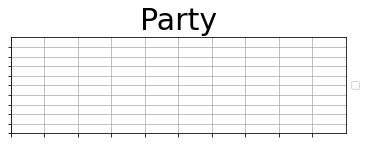

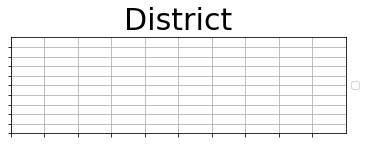

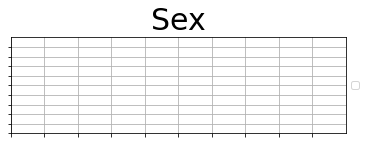

In [14]:
outputsize=(10,10)
predicted_output_node, order_inputs, weights = som_votes(votes, outputsize, learning_rate=0.1, epochs=1000, neighbourhood_init=4)

# Define a function to add noise to points and then do not plot all points in exactly same coordinate
def noisy_index(point, noise=0.5):
    return point.astype(float)+np.random.uniform(-noise, noise, size=point.shape)


i = 1
# Iterate feature names
for cri in range(len(Criterion)):
    fig = plt.figure(figsize=(6,6))  
    
    # Iterate unique values in that feature
    for val in np.unique(mp_criterion[:,cri]):

        # Find the output node assigned to each minister with that feature value
        x, y = np.unravel_index(predicted_output_node[mp_criterion[:,cri]==val], outputsize)
        
        # Plot the position in output space of each minister with that feature value
        plt.scatter(noisy_index(x), noisy_index(y), s=20, alpha=1, label=Names[cri][val-1])
        
    
    # Edit the plot
    
    plt.title(Criterion[cri], fontsize=30, y=1.02)
    plt.xticks(np.arange(-0.5, outputsize[0]-0.5, 1), labels=[])
    plt.yticks(np.arange(-0.5, outputsize[1]-0.5, 1), labels=[])
    plt.grid(True)
    plt.xlim([-0.5, outputsize[0]-0.5])
    plt.ylim([-0.5, outputsize[1]-0.5])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

